In [1]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
unemployment_raw = pd.read_csv("formatted/unemployment.csv")
unemployment_raw.head()

,State,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,AL,6.0,5.2,5.0,4.4,4.7,4.6,5.1,5.9,6.0,...,4.0,5.7,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.9
1,AK,7.3,7.6,7.1,6.3,6.5,6.4,6.4,7.3,7.8,...,6.3,6.7,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9
2,AZ,5.3,5.6,4.6,4.3,4.4,4.0,4.8,6.1,5.7,...,3.9,6.2,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4
3,AR,4.8,5.3,5.2,5.2,4.6,4.3,5.0,5.5,5.9,...,5.3,5.5,7.8,8.2,8.3,7.6,7.2,6.0,5.0,3.9
4,CA,7.9,7.3,6.4,5.9,5.2,4.9,5.4,6.7,6.8,...,5.4,7.3,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5


In [3]:
tidy_unemployment = pd.melt(unemployment_raw, id_vars = ['State'], var_name='Year', value_name='unemployment_rate')
tidy_unemployment.sort_values(by=['State','Year'], inplace=True)
tidy_unemployment.head()

,State,Year,unemployment_rate
1,AK,1995,7.3
52,AK,1996,7.6
103,AK,1997,7.1
154,AK,1998,6.3
205,AK,1999,6.5


In [4]:
unemployment_matrix = tidy_unemployment.pivot("State", "Year", "unemployment_rate")
unemployment_matrix.head()

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
AK,7.3,7.6,7.1,6.3,6.5,6.4,6.4,7.3,7.8,7.5,...,6.3,6.7,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9
AL,6.0,5.2,5.0,4.4,4.7,4.6,5.1,5.9,6.0,5.7,...,4.0,5.7,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.9
AR,4.8,5.3,5.2,5.2,4.6,4.3,5.0,5.5,5.9,5.7,...,5.3,5.5,7.8,8.2,8.3,7.6,7.2,6.0,5.0,3.9
AZ,5.3,5.6,4.6,4.3,4.4,4.0,4.8,6.1,5.7,5.0,...,3.9,6.2,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4
CA,7.9,7.3,6.4,5.9,5.2,4.9,5.4,6.7,6.8,6.2,...,5.4,7.3,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5


Text(0.5,1,'Heatmap of unemployment rate from 1995 to 2016')

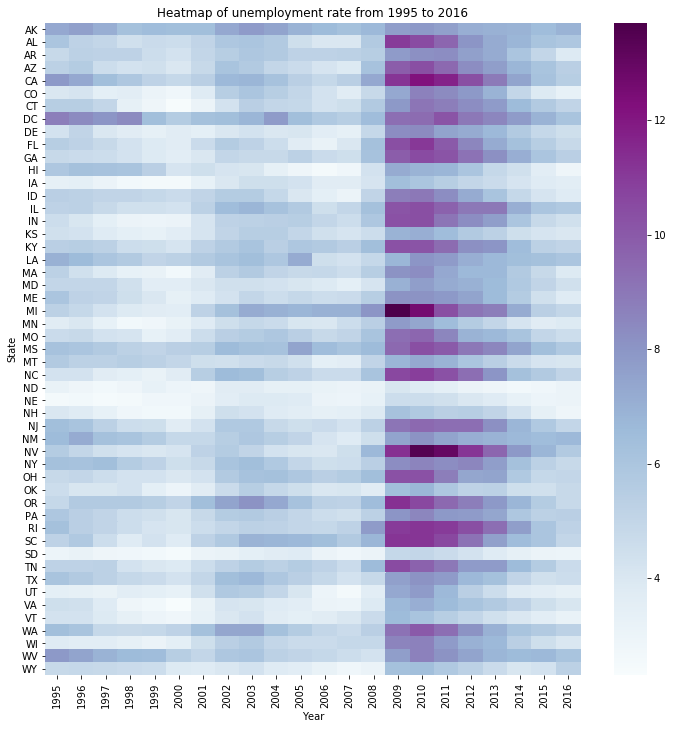

In [5]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(unemployment_matrix, cmap='BuPu')
r.set_title("Heatmap of unemployment rate from 1995 to 2016")

In [7]:
fig.savefig("Output/heatmap_unemployment.png")